In [38]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv("data/car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [30]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [31]:
# prepare the dataset
df = df.fillna(0)

In [32]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [33]:
print(len(df_train), len(df_val), len(df_test))

5822 1941 1941


In [ ]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [35]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [37]:
# Q1
from sklearn.tree import DecisionTreeRegressor, export_text

model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)

print(export_text(model, feature_names=list(dv.get_feature_names_out())))


|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [41]:
# Q2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=10, 
                              random_state=1,
                              n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print(np.sqrt(mse))

0.45707126026197337


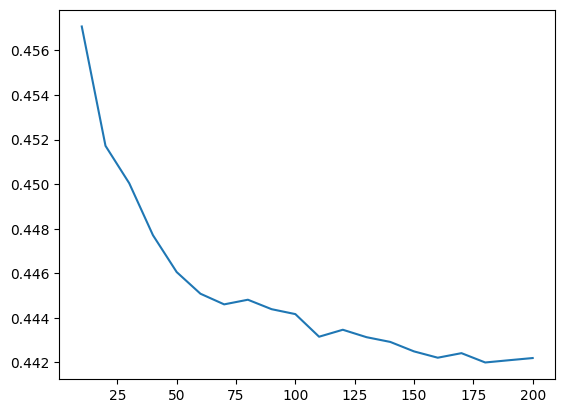

In [46]:
# Q3
import matplotlib.pyplot as plt

scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, 
                              random_state=1,
                              n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, rmse))
    
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)

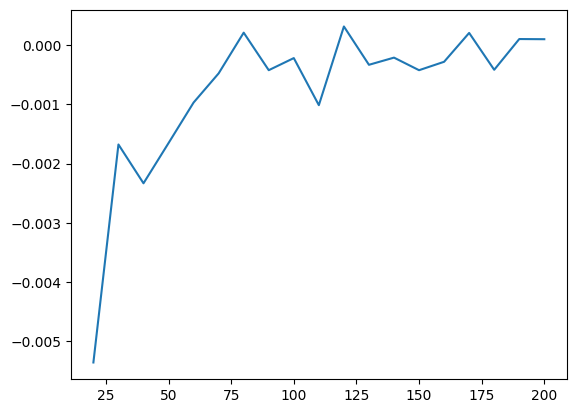

In [54]:
plt.plot(range(20, 201, 10), np.diff(df_scores.rmse))


In [58]:
# Q4
scores = []

for depth in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(max_depth=depth,
                                    n_estimators=n, 
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        
        scores.append((depth, n, rmse))
        
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse                     
max_depth        10     15     20     25
n_estimators                            
10            0.451  0.457  0.458  0.457
20            0.448  0.452  0.453  0.452
30            0.445  0.450  0.452  0.451
40            0.443  0.448  0.449  0.448
50            0.442  0.446  0.447  0.447
60            0.441  0.445  0.446  0.445
70            0.441  0.444  0.445  0.445
80            0.441  0.445  0.445  0.445
90            0.441  0.444  0.445  0.445
100           0.441  0.444  0.445  0.445
110           0.440  0.443  0.444  0.444
120           0.441  0.443  0.444  0.444
130           0.440  0.443  0.444  0.443
140           0.440  0.443  0.444  0.443
150           0.440  0.442  0.443  0.443
160           0.440  0.442  0.443  0.442
170           0.440  0.442  0.443  0.443
180           0.440  0.442  0.443  0.442
190           0.440  0.442  0.443  0.442
200           0.440  0.442  0.443  0.442

In [60]:
# Q5
rf = RandomForestRegressor(max_depth=20,
                            n_estimators=10, 
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

rf.feature_importances_

array([1.14536287e-02, 3.96650944e-04, 3.11283259e-04, 3.28170182e-03,
       3.69466267e-04, 3.01551010e-04, 1.60423301e-02, 3.16452511e-03,
       2.33145848e-03, 1.62794233e-03, 4.85137573e-04, 4.93652614e-04,
       5.64584351e-04, 9.59176087e-01])

In [64]:
df_fi = pd.DataFrame({
    'feature': dv.get_feature_names_out(),
    'importance': rf.feature_importances_
})

df_fi.sort_values(by='importance', ascending=False)

,feature,importance
13,vehicle_weight,0.959176
6,horsepower,0.016042
0,acceleration,0.011454
3,engine_displacement,0.003282
7,model_year,0.003165
8,num_cylinders,0.002331
9,num_doors,0.001628
12,origin=USA,0.000565
11,origin=Europe,0.000494
10,origin=Asia,0.000485


In [67]:
# Q6
import xgboost as xgb

In [87]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train-rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [88]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [89]:
scores = {}

In [94]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5
                  ,
                  evals=watchlist)

In [95]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

eta=0.3 0.43362
eta=0.1 0.42449


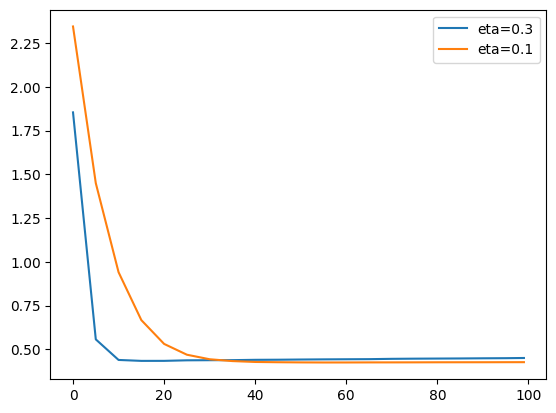

In [97]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)
    print(eta, min(df_score['val_rmse']))
plt.legend()